*Aveen Hussein*

# Step1: Importing data
 The dataset consists of mobile features and we aim to estimate a mobile price depending on them.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
# Reading our csv data
combine_data= pd.read_csv('/content/drive/MyDrive/Machine Learning/train.csv')
print (combine_data.head(5))
# null value
print (combine_data.isnull().sum())

print (combine_data.isnull().sum())
# max min mean for each col.....
print(combine_data.describe())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


now we can take note that the number of null values was 0 for every feature in this dataset but it doesn't mean that there doesn't exist any missing data which is just represented differently and that is what we will investigate in the Missing data section



# Step2: Basic cleaning

In [3]:
from sklearn.feature_extraction import DictVectorizer
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer

In [4]:
combine_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

We see that all the data is int64 except for m_dep and m_cores, which is good as we can see that there are no mixed letters and number values so "" was not used to represent nan values for instance

**handeling data types**

Id3 algorithm works best with numeric data, and luckily in our case all the data is already numeric. 
**a brief on how splits are made for numeric data according to the internet**

Every split in a decision tree is based on a feature. If the feature is categorical, the split is done with the elements belonging to a particular class. If the feature is contiuous, the split is done with the elements higher than a threshold. At every split, the decision tree will take the best variable at that moment. This will be done according to an impurity measure with the splitted branches. And the fact that the variable used to do split is categorical or continuous is irrelevant (in fact, decision trees categorize contiuous variables by creating binary regions with the threshold).
src: https://datascience.stackexchange.com/questions/32622/how-to-make-a-decision-tree-with-both-continuous-and-categorical-variables-in-th

#Step3: Missing data

Now we will try to find out if there's any data with zero values that indicate missing data (for instance a mobile with 0 for battary power is likely a case of missing data same goes for multiple columns such as sc_h and sc_w and n_cores and so on)

In [5]:
len(combine_data.loc[(combine_data['battery_power']==0) | (combine_data['clock_speed']==0)|(combine_data['int_memory']==0)|
                    (combine_data['m_dep']==0)|(combine_data['mobile_wt']==0)|(combine_data['px_height']==0)|
                    (combine_data['px_height']==0)|(combine_data['px_width']==0)|(combine_data['ram']==0)|
                    ( combine_data['sc_h']==0)|(combine_data['sc_w']==0)|(combine_data['talk_time']==0)])

181

In [6]:
len(combine_data)

2000

so 181 out of 2000 fields has what we can assume is missing values

Now we will remove the rows that do have missing data 

In [7]:
combine_data_no_0=combine_data.loc[(combine_data['battery_power']!=0) & (combine_data['clock_speed']!=0)&(combine_data['int_memory']!=0)&
                    (combine_data['m_dep']!=0)&(combine_data['mobile_wt']!=0)&(combine_data['px_height']!=0)&
                    (combine_data['px_height']!=0)&(combine_data['px_width']!=0)&(combine_data['ram']!=0)&
                    ( combine_data['sc_h']!=0)&(combine_data['sc_w']!=0)&(combine_data['talk_time']!=0)]

In [8]:
len(combine_data_no_0)

1819

In [9]:
imputer = SimpleImputer(missing_values=0,
                        strategy='mean')


In [10]:
data_to_impute=combine_data[['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram','sc_h','sc_w','talk_time']]

In [11]:
imputer = imputer.fit(data_to_impute)

data = imputer.transform(data_to_impute)

print("Imputed Data : \n", data)

Imputed Data : 
 [[8.420e+02 2.200e+00 7.000e+00 ... 9.000e+00 7.000e+00 1.900e+01]
 [1.021e+03 5.000e-01 5.300e+01 ... 1.700e+01 3.000e+00 7.000e+00]
 [5.630e+02 5.000e-01 4.100e+01 ... 1.100e+01 2.000e+00 9.000e+00]
 ...
 [1.911e+03 9.000e-01 3.600e+01 ... 9.000e+00 1.000e+00 5.000e+00]
 [1.512e+03 9.000e-01 4.600e+01 ... 1.800e+01 1.000e+01 1.900e+01]
 [5.100e+02 2.000e+00 4.500e+01 ... 1.900e+01 4.000e+00 2.000e+00]]


In [12]:
imputed=pd.DataFrame(data=data, columns=['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram','sc_h','sc_w','talk_time'])

In [13]:
imputed.describe()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,32.046500,0.501750,140.249000,645.753754,1251.515500,2124.213000,12.306500,6.337363,11.011000
std,439.418206,0.816004,18.145715,0.288416,35.399655,443.310973,432.199447,1084.732044,4.213245,3.960716,5.463955
min,501.000000,0.500000,2.000000,0.100000,80.000000,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000
25%,851.750000,0.700000,16.000000,0.200000,109.000000,284.000000,874.750000,1207.500000,9.000000,3.000000,6.000000
50%,1226.000000,1.500000,32.000000,0.500000,141.000000,568.000000,1247.000000,2146.500000,12.000000,6.000000,11.000000
75%,1615.250000,2.200000,48.000000,0.800000,170.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,64.000000,1.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [14]:
data_to_keep=combine_data.drop(['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram','sc_h','sc_w','talk_time'],axis=1)

In [15]:
All_data=pd.concat([imputed,data_to_keep],axis=1)

In [16]:
All_data.describe()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,...,blue,dual_sim,fc,four_g,n_cores,pc,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,32.046500,0.501750,140.249000,645.753754,1251.515500,2124.213000,12.306500,6.337363,...,0.4950,0.509500,4.309500,0.521500,4.520500,9.916500,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.816004,18.145715,0.288416,35.399655,443.310973,432.199447,1084.732044,4.213245,3.960716,...,0.5001,0.500035,4.341444,0.499662,2.287837,6.064315,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.500000,2.000000,0.100000,80.000000,1.000000,500.000000,256.000000,5.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.700000,16.000000,0.200000,109.000000,284.000000,874.750000,1207.500000,9.000000,3.000000,...,0.0000,0.000000,1.000000,0.000000,3.000000,5.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,1.500000,32.000000,0.500000,141.000000,568.000000,1247.000000,2146.500000,12.000000,6.000000,...,0.0000,1.000000,3.000000,1.000000,4.000000,10.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,2.200000,48.000000,0.800000,170.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,...,1.0000,1.000000,7.000000,1.000000,7.000000,15.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,3.000000,64.000000,1.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,...,1.0000,1.000000,19.000000,1.000000,8.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
len(All_data.loc[(All_data['battery_power']==0) | (All_data['clock_speed']==0)|(All_data['int_memory']==0)|
                    (All_data['m_dep']==0)|(All_data['mobile_wt']==0)|(All_data['px_height']==0)|
                    (All_data['px_height']==0)|(All_data['px_width']==0)|(All_data['ram']==0)|
                    ( All_data['sc_h']==0)|(All_data['sc_w']==0)|(All_data['talk_time']==0)])

0

As we can see all the 0 values are successfully replaced with imputed values which are calculated using the mean of all the data in the same column

**as we can see there are no null values in the data, so there is no need to drop them**

# Step5: Data analysis

detecting outliers using IQR, model performance can be improved by handling noisy data.

In [18]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   indices=list(df.index[(df<lower)|(df>upper)])
   df = np.where(df > upper,
       df.mean(),
       np.where(
           
           df < lower,
           df.mean(),
           df
           )
       )
   print(indices)
   return df

In [19]:
columns =['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_height','px_width','ram','sc_h','sc_w','talk_time']
 
# Iterate over column names
for column in columns:
     
    All_data[column] = impute_outliers_IQR(All_data[column])

[]
[]
[]
[]
[]
[988, 1771]
[]
[]
[]
[]
[]
[]


# Step6: Data disterbution

we begin by plotting a boxplot

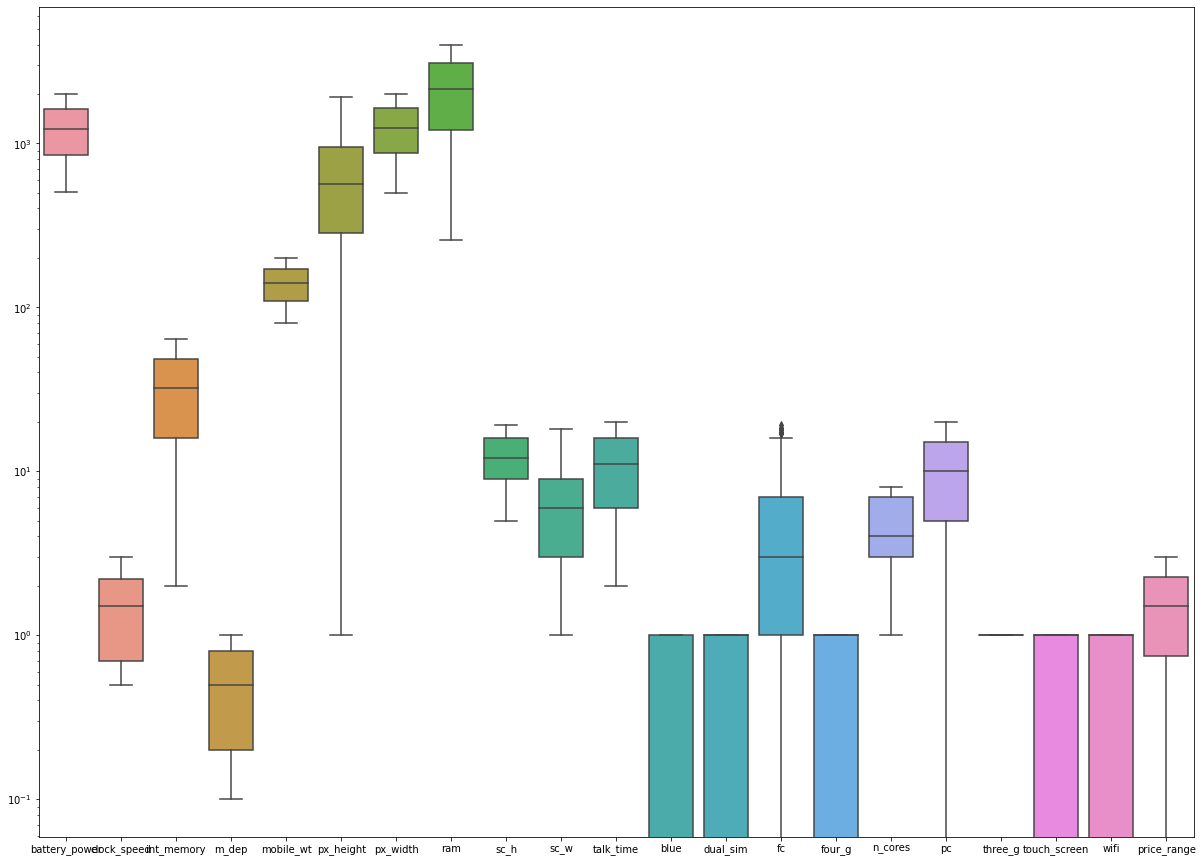

In [20]:
# plot col value
a4_dims = (20.7, 15.27)
fig, ax = plt.subplots(figsize=a4_dims)

# ax.set(ylim=(10e-500, 10e5))
g = sns.boxplot(data=All_data,ax=ax)

g.set_yscale("log")


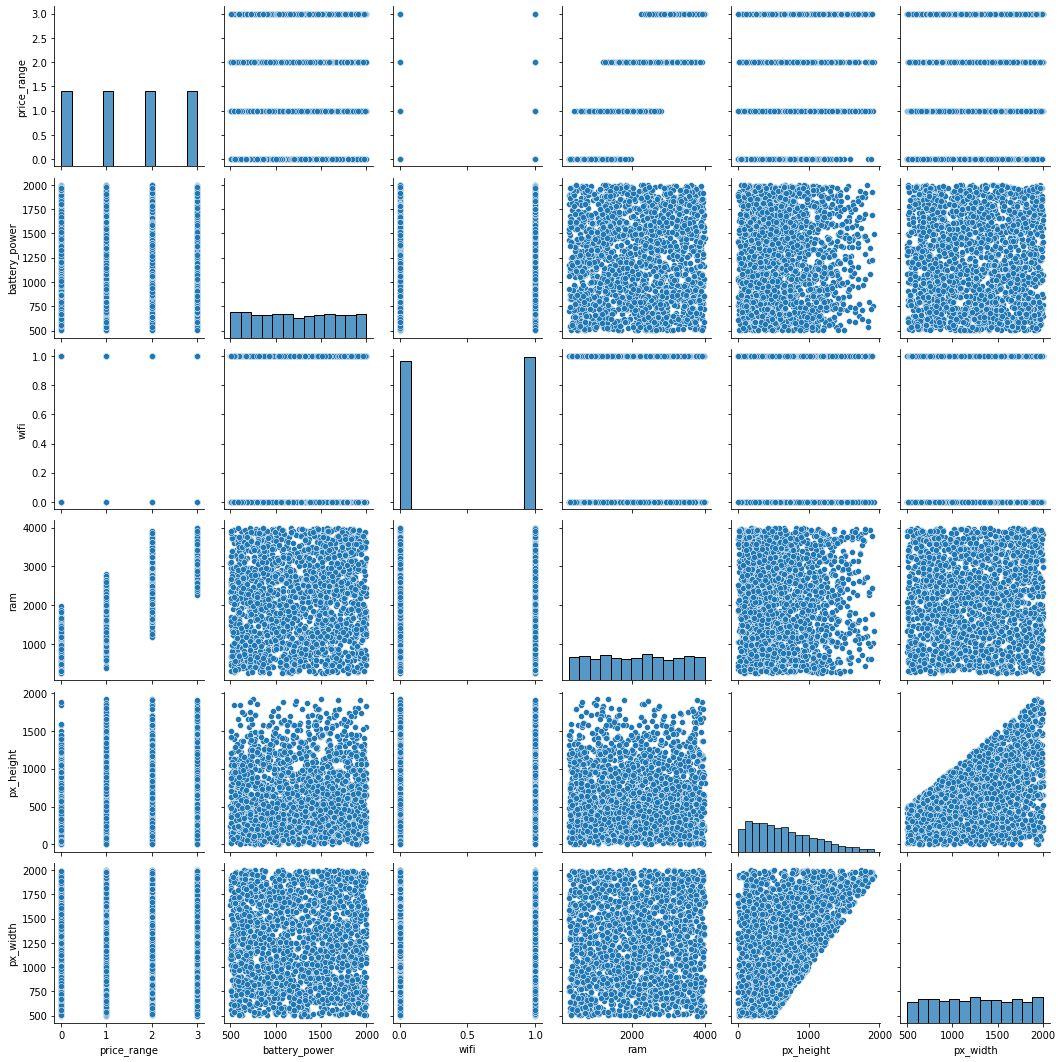

In [21]:
sns.pairplot(All_data,vars=["price_range","battery_power","wifi","ram","px_height","px_width"])

notably, there appears to be a relation between px_height and px_width (which is to be expected from a mobile screen) but most impornantly, there seems to be a relation between mobile ram and price_range.

In [22]:
#correlation between
print(combine_data.corr())
# #plt.show()



               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008

as to be expected, the corrolation between ram and mobile price appears to be the highest, followed by battary_power

some features may have useful meanings to add to the model when combined with other features, and since we only have 21 features to begin with then creating combinations of features should be computationally feasible

In [23]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
  # Get feature names
  combos = list(combinations(list(df.columns), 2))
  colnames = list(df.columns) + ['_'.join(x) for x in combos]

  # Find interactions
  poly = PolynomialFeatures(interaction_only=True, include_bias=False)
  df = poly.fit_transform(df)
  df = pd.DataFrame(df)
  df.columns = colnames

  # Remove interaction terms with all 0 values            
  noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
  df = df.drop(df.columns[noint_indicies], axis=1)

  return df
X=All_data.iloc[:,:-1]
X = add_interactions(X)
print(X.head())

   battery_power  clock_speed  int_memory  m_dep  mobile_wt  px_height  \
0          842.0          2.2         7.0    0.6      188.0       20.0   
1         1021.0          0.5        53.0    0.7      136.0      905.0   
2          563.0          0.5        41.0    0.9      145.0     1263.0   
3          615.0          2.5        10.0    0.8      131.0     1216.0   
4         1821.0          1.2        44.0    0.6      141.0     1208.0   

   px_width     ram  sc_h  sc_w  ...  n_cores_pc  n_cores_three_g  \
0     756.0  2549.0   9.0   7.0  ...         4.0              0.0   
1    1988.0  2631.0  17.0   3.0  ...        18.0              3.0   
2    1716.0  2603.0  11.0   2.0  ...        30.0              5.0   
3    1786.0  2769.0  16.0   8.0  ...        54.0              6.0   
4    1212.0  1411.0   8.0   2.0  ...        28.0              2.0   

   n_cores_touch_screen  n_cores_wifi  pc_three_g  pc_touch_screen  pc_wifi  \
0                   0.0           2.0         0.0            

# Step6: Feature selection

Now we prepare the data for training
firstly, by splitting it into training and testing sets

In [24]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
   X,
    All_data.iloc[:,-1],
    test_size=0.2,
    random_state=0)
# #size for test and train
print(X_train.shape)

print(X_test.shape)

(1600, 210)
(400, 210)


we will go for a simple method of selecting the k-best features

In [25]:
import sklearn.feature_selection
# Create and fit selector
selector = sklearn.feature_selection.SelectKBest( k=20)
selected_features=selector.fit(X_train, y_train)
# Get columns to keep and create new dataframe with those only
cols_indices = selected_features.get_support(indices=True)

cols_selected=[X.columns[i] for i in cols_indices]
X_trainselected=X_train[cols_selected]
X_testselected=X_test[cols_selected]


In [26]:
print(cols_selected)

['ram', 'battery_power_ram', 'clock_speed_ram', 'int_memory_ram', 'm_dep_ram', 'mobile_wt_ram', 'px_height_ram', 'px_width_ram', 'ram_sc_h', 'ram_sc_w', 'ram_talk_time', 'ram_blue', 'ram_dual_sim', 'ram_fc', 'ram_four_g', 'ram_n_cores', 'ram_pc', 'ram_three_g', 'ram_touch_screen', 'ram_wifi']


In [27]:
# most important
reg= ExtraTreesClassifier()
reg.fit(X_trainselected,y_train)
print(reg.feature_importances_)

[0.14221842 0.16953872 0.02507967 0.02741655 0.02526341 0.05539326
 0.06723749 0.10565371 0.0456842  0.02332032 0.03002851 0.02736094
 0.02893333 0.01690348 0.02822696 0.03152308 0.02176879 0.0701953
 0.0249886  0.03326525]


printing out feature importances that will help us in the feature selection

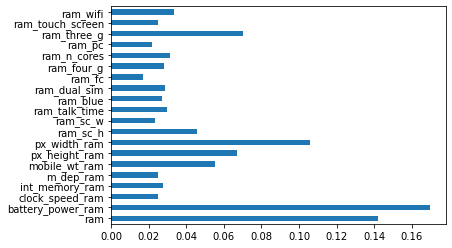

In [28]:
feat_importances = pd.Series(reg.feature_importances_, index=X_trainselected.columns)
feat_importances.plot(kind='barh')
plt.show()


we can clearly see that ram combined with battery power is the most important feature by far

In [29]:
#train DT
reg_decision_model=DecisionTreeClassifier()
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_trainselected,y_train)
# show score
print(reg_decision_model.score(X_trainselected,y_train))
print(reg_decision_model.score(X_testselected,y_test))


1.0
0.875


# Building a model on unprocessed data for comparason

In [30]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
   combine_data.iloc[:,:-1],
    combine_data.iloc[:,-1],
    test_size=0.2,
    random_state=0)

In [31]:
#train DT
reg_decision_model1=DecisionTreeClassifier()
# fit independent varaibles to the dependent variables
reg_decision_model1.fit(X_train1,y_train1)
# show score
print(reg_decision_model1.score(X_train1,y_train1))
print(reg_decision_model1.score(X_test1,y_test1))

1.0
0.845


as we can see the model for unprocessed data doesn't do very badly as it scores at 83% but it's still not as good as the processed model with 87% but this score isn't the best indicator and we will use ROC curves for a better evaluation.

# Hyperparameter tuning, and model evaluation

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


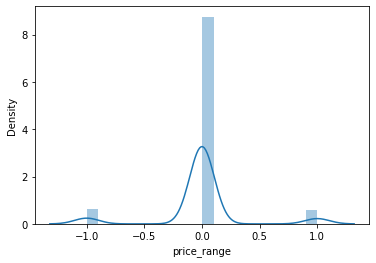

In [34]:
#Decision Tree Model Evaluation
prediction=reg_decision_model.predict(X_testselected)
prediction1=reg_decision_model1.predict(X_test1)

# checking difference between labled y and predicted y

sns.distplot(y_test-prediction)


we can tell by this near-bell curve that our model that our prediction is within the same range of the actual price range

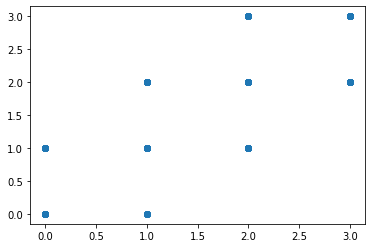

In [35]:
plt.scatter(y_test,prediction)
plt.show()

there's an apparant corrolation between the predicted price and the actual price

In [36]:
#Hyper Parameter tuning
parameters={"splitter":["best","random"],
            "max_depth" : [5,6,7,9,11],
           "min_samples_leaf":[1,2,3],
           "min_weight_fraction_leaf":[0.0001,0.001,0.01,0.1,0.2,0.3],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,20,30,40,50] }


In [37]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='f1_weighted',cv=7,verbose=3)
# best hyperparameters
X=X_trainselected
y=y_train
tuning_model.fit(X,y)



Streaming output truncated to the last 5000 lines.
[CV 6/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01, splitter=random;, score=0.757 total time=   0.0s
[CV 7/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01, splitter=random;, score=0.787 total time=   0.0s
[CV 1/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.708 total time=   0.0s
[CV 2/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.648 total time=   0.0s
[CV 3/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.613 total time=   0.0s
[CV 4/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitt

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 9, 11],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_weight_fraction_leaf': [0.0001, 0.001, 0.01, 0.1,
                                                      0.2, 0.3],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=3)

In [38]:
print(tuning_model.best_params_)


{'max_depth': 11, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0001, 'splitter': 'best'}


0.959375
0.885


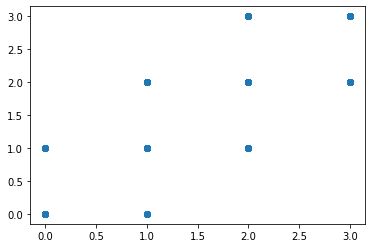

In [39]:

#Training Decision Tree With Best Hyperparameters
tuned_hyper_model= DecisionTreeClassifier(max_depth=11,max_features=None,max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.001,splitter='best')
tuned_hyper_model.fit(X_trainselected,y_train)
tuned_pred=tuned_hyper_model.predict(X_testselected)
print(tuned_hyper_model.score(X_trainselected,y_train))
print(tuned_hyper_model.score(X_testselected,y_test))
plt.scatter(y_test,tuned_pred)
plt.show()

In [40]:
# calculating different classification metrics (4 features)

tuning_model1=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='f1_weighted',cv=7,verbose=3)
# best hyperparameters
X=X_train1
y=y_train1
tuning_model1.fit(X,y)



Streaming output truncated to the last 5000 lines.
[CV 6/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01, splitter=random;, score=0.322 total time=   0.0s
[CV 7/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01, splitter=random;, score=0.444 total time=   0.0s
[CV 1/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.329 total time=   0.0s
[CV 2/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.454 total time=   0.0s
[CV 3/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=0.540 total time=   0.0s
[CV 4/7] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitt

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 9, 11],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_weight_fraction_leaf': [0.0001, 0.001, 0.01, 0.1,
                                                      0.2, 0.3],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=3)

In [41]:
print(tuning_model1.best_params_)


{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.001, 'splitter': 'best'}


0.898125
0.8425


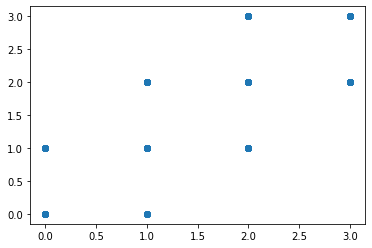

In [43]:

#Training Decision Tree With Best Hyperparameters with 4 features
tuned_hyper_model1= DecisionTreeClassifier(max_depth=9,max_features=None,max_leaf_nodes=30,min_samples_leaf=2,min_weight_fraction_leaf=0.001,splitter='best')
tuned_hyper_model1.fit(X_train1,y_train)
tuned_pred1=tuned_hyper_model1.predict(X_test1)
print(tuned_hyper_model1.score(X_train1,y_train))
print(tuned_hyper_model1.score(X_test1,y_test))
plt.scatter(y_test,tuned_pred1)
plt.show()

# Now lets compare the error rates in the tuned model VS. the model before tuning

*hyperparameter tuned for processed data*

In [44]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, tuned_pred)
print(matrix)

[[ 89   6   0   0]
 [  5  76  11   0]
 [  0   8  83   8]
 [  0   0   8 106]]


*hyperparameter tuned for unprocessed data*

In [45]:
matrix = confusion_matrix(y_test, tuned_pred1)
print(matrix)

[[ 87   8   0   0]
 [  6  74  12   0]
 [  0  15  74  10]
 [  0   0  12 102]]


*not hyperparameter tuned for processed data*

In [46]:
matrix = confusion_matrix(y_test, prediction)
print(matrix)

[[ 86   9   0   0]
 [  6  77   9   0]
 [  0   9  82   8]
 [  0   0   9 105]]


*not hyperparameter tuned for unprocessed data*

In [47]:
matrix = confusion_matrix(y_test1, prediction1)
print(matrix)

[[ 90   5   0   0]
 [  6  75  11   0]
 [  0  13  73  13]
 [  0   0  14 100]]


In [48]:
from sklearn.metrics import f1_score
f1scoreTuned=f1_score(y_test,tuned_pred, average='weighted')
print(f1scoreTuned)

0.8851681458397875


In [49]:
f1scoreTunedMinFeatures=f1_score(y_test,tuned_pred1, average='weighted')
print(f1scoreTunedMinFeatures)

0.8431153733556119


In [50]:
f1score=f1_score(y_test,prediction, average='weighted')
print(f1score)

0.8754871994782742


In [51]:
f1score=f1_score(y_test,prediction1, average='weighted')
print(f1score)

0.8448361935402715


# Descussing the results

* As we can see, the model performed better after tuning the hyper parameters for both processed and raw data, but the models with the processed data preformed significantly better in terms of f1_score. Score is higher for the untrained data which is an indicator that it has a bigger ability to be generalized, while the untrained model has better score with the trained data due to overfitting. And we got a better f1_score.
* the preprocessing of taking the combination of 2 features has improved on the f1_score which suggests that the mobile price range is dependent on the combination of more than one feature which is not something that ID3 algorithm provide for the given features. Hence, dependancy of price range on a certain feature is not independant from the depebdancy on other features.

